<a href="https://colab.research.google.com/github/AlexNedyalkov/Keras-Time-Series-Tutorials/blob/master/00_Keras_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Basics

In [1]:
# You can safely ignore any warnings on importing this
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Simple y=mx+b+noise data

In [6]:
m = 2
b = 3
x = np.linspace(0, 50, 100)

In [5]:
np.random.seed(101)
noise = np.random.normal(loc = 0.0, scale = 4.0, size = len(x))

In [7]:
y = m * x + b + noise

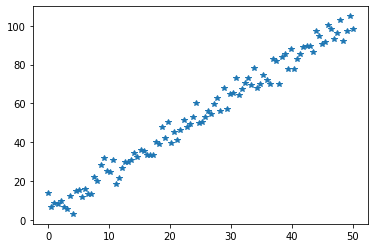

In [9]:
plt.plot(x,y,'*')
plt.show()

## Creating a Neural Network for a Line of Best Fit

In [ ]:
#create model
model = Sequential()
model.add(Dense(4, input_dim = 1, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "linear"))


In [ ]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [ ]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
100/100 [==============================] - 0s 128us/step - loss: 16.9098
Epoch 2/500
100/100 [==============================] - 0s 135us/step - loss: 16.9122
Epoch 3/500
100/100 [==============================] - 0s 175us/step - loss: 16.9011
Epoch 4/500
100/100 [==============================] - 0s 361us/step - loss: 16.8552
Epoch 5/500
100/100 [==============================] - 0s 273us/step - loss: 16.8889
Epoch 6/500
100/100 [==============================] - 0s 162us/step - loss: 16.9019
Epoch 7/500
100/100 [==============================] - 0s 204us/step - loss: 16.9354
Epoch 8/500
100/100 [==============================] - 0s 123us/step - loss: 16.9697
Epoch 9/500
100/100 [==============================] - 0s 150us/step - loss: 16.9971
Epoch 10/500
100/100 [==============================] - 0s 186us/step - loss: 16.9511
Epoch 11/500
100/100 [==============================] - 0s 148us/step - loss: 16.8876
Epoch 12/500
100/100 [==============================] - 0s 188u

100/100 [==============================] - 0s 105us/step - loss: 16.8353
Epoch 191/500
100/100 [==============================] - 0s 148us/step - loss: 16.8542
Epoch 192/500
100/100 [==============================] - 0s 151us/step - loss: 16.8495
Epoch 193/500
100/100 [==============================] - 0s 137us/step - loss: 16.8454
Epoch 194/500
100/100 [==============================] - 0s 111us/step - loss: 16.8404
Epoch 195/500
100/100 [==============================] - 0s 173us/step - loss: 16.8441
Epoch 196/500
100/100 [==============================] - 0s 181us/step - loss: 16.8462
Epoch 197/500
100/100 [==============================] - 0s 164us/step - loss: 16.8449
Epoch 198/500
100/100 [==============================] - 0s 159us/step - loss: 16.8538
Epoch 199/500
100/100 [==============================] - 0s 159us/step - loss: 16.8721
Epoch 200/500
100/100 [==============================] - 0s 182us/step - loss: 16.8751
Epoch 201/500
100/100 [==============================] - 

100/100 [==============================] - 0s 133us/step - loss: 16.8380
Epoch 379/500
100/100 [==============================] - 0s 163us/step - loss: 16.8590
Epoch 380/500
100/100 [==============================] - 0s 107us/step - loss: 16.8238
Epoch 381/500
100/100 [==============================] - 0s 134us/step - loss: 16.8295
Epoch 382/500
100/100 [==============================] - 0s 135us/step - loss: 16.8317
Epoch 383/500
100/100 [==============================] - 0s 136us/step - loss: 16.8185
Epoch 384/500
100/100 [==============================] - 0s 152us/step - loss: 16.8461
Epoch 385/500
100/100 [==============================] - 0s 136us/step - loss: 16.8474
Epoch 386/500
100/100 [==============================] - 0s 124us/step - loss: 16.8867
Epoch 387/500
100/100 [==============================] - 0s 153us/step - loss: 16.8892
Epoch 388/500
100/100 [==============================] - 0s 171us/step - loss: 16.8735
Epoch 389/500
100/100 [==============================] - 

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [ ]:
x_for_predictions = np.linspace(0,50,1000)

In [ ]:
y_predicted = model.predict(x_for_predictions)

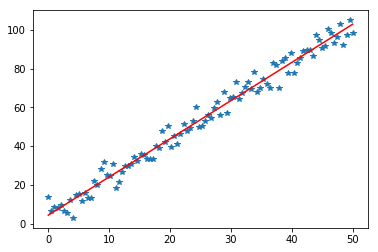

In [ ]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [ ]:
mean_squared_error(y,prediction_for_true_y)

16.820542043655355

In [ ]:
mean_absolute_error(y,prediction_for_true_y)

3.291464809895978

 Notice how MSE value was being reported out by Keras during training!
 
 Is this a good error value? Really depends on the context, refer back to our model evaluation lecture for full details!